In [29]:
# Q.2 Take ten colonies of Indore OR 10 cities of India of your choice. 
# Find out their longitude and lattitude through scraping.

import requests
from bs4 import BeautifulSoup

url = "https://www.latlong.net/place/indore-madhya-pradesh-india-2528.html"
page = requests.get(url)
plain_text = page.text
soup = BeautifulSoup(plain_text, "html.parser")
soup = soup.find_all('ul')[2]
loc = soup.find_all('a')
allLoc = []
latitude = []
longitude = []
for i in range(0,len(soup)-1):
    allLoc.append(str(loc[i].text))
for item in soup:
    if item == '\n':
        continue
    k = str(item).split("(")[-1].split(")")[0].split(",")
    latitude.append(float(k[0]))
    longitude.append(float(k[1]))
print (allLoc)
print (latitude)
print (longitude)


['Chittorgarh, Rajasthan, India', 'Ratnagiri, Maharashtra, India', 'Goregaon, Mumbai, Maharashtra, India', 'Pindwara, Rajasthan, India', 'Raipur, Chhattisgarh, India', 'Gokak, Karnataka, India', 'Lucknow, Uttar Pradesh, India', 'Delhi, the National Capital Territory of Delhi, India', 'Mumbai, Maharashtra, India', 'Sagar, Karnataka, India']
[24.879999, 16.994444, 19.155001, 24.7945, 21.25, 16.1667, 26.85, 28.610001, 19.07609, 14.16704]
[74.629997, 73.300003, 72.849998, 73.055, 81.629997, 74.833298, 80.949997, 77.230003, 72.877426, 75.040298]


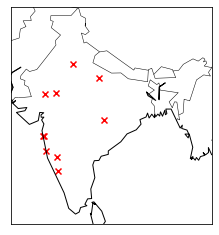

In [33]:
# Q.3 Visualize the above 10 points on a 2D map of Indore or India/

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

m = Basemap(llcrnrlon=68.1,
            llcrnrlat=6.6,
            urcrnrlon=97.4,
            urcrnrlat=35.7,
            lat_0=54.5,
            lon_0=-4.36,
            projection='merc',
            resolution = 'c',
            area_thresh=10000.,
            )
# m.drawmapboundary(fill_color='aqua')
# m.fillcontinents(color='coral',lake_color='aqua')
m.drawcoastlines()
m.drawcountries()
m.drawstates()

for i in range(0,len(latitude)):
    lons, lats = m(longitude[i],latitude[i])
    # plot points as red dots
    m.scatter(lons,lats, marker = 'x', color='r')
m

In [4]:
# Q.4 Download first 100 pages on your favourite item on google search. 
# For example, if you are very keen to know more about Sachin Tendulkar, download the first 100 pages as 
# if you search on google.

import requests
import unicodedata
import os
import urllib.request, urllib.error, urllib.parse
from bs4 import BeautifulSoup

from googlesearch import search 
# to search 
query = "AmanBhawsar"
urlCollection = []  
for j in search(query, tld='com', lang='en', num=10, start=0, stop=10, pause=2): 
    urlCollection.append(j)
# print(urlCollection)
user_agent = {'User-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36'}

ctr = int(0)
os.makedirs(query)
for url in urlCollection:
    ctr = ctr + 1
    soup = BeautifulSoup(requests.get(url).text, 'html.parser')
    fileN = './'+query+'/'+str(ctr)+'.html'
    soup = soup.encode("utf-8")
    with open(fileN, "w") as file:
        k = (str(soup)).replace('\\n', '')
        k = k.replace('b\'', '')
        print(k+"\n")
        file.write(k)
'''
import urllib.request, urllib.error, urllib.parse

url = 'http://www.oldbaileyonline.org/browse.jsp?id=t17800628-33&div=t17800628-33'

response = urllib.request.urlopen(url)
webContent = response.read()

f = open('obo-t17800628-33.html', 'w')
f.write(webContent.decode("utf-8") )
f.close

'''

In [65]:
# Q.5 Download first 100 images from google search of your favourite article/person/topic. 
# These images will not be of same size. Resize each of these images to same size (e.g. 100 px by 100 px)

from urllib.request import Request, urlopen
import os
from selenium import webdriver 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC 
from selenium.webdriver.common.keys import Keys 
from selenium.webdriver.common.by import By
import time
import requests
import io
from PIL import Image
import hashlib



def persist_image(folder_path:str,url:str):
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - Could not download {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SUCCESS - saved {url} - as {file_path}")
    except Exception as e:
        print(f"ERROR - Could not save {url} - {e}")

def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, sleep_between_interactions:int=1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)    
    
    # build the google query
    search_url = "https://www.google.com/search?safe=off&site=&tbm=isch&source=hp&q={q}&oq={q}&gs_l=img"

    # load the page
    wd.get(search_url.format(q=query))

    image_urls = set()
    image_count = 0
    results_start = 0
    while image_count < max_links_to_fetch:
        scroll_to_end(wd)

        # get all image thumbnail results
        thumbnail_results = wd.find_elements_by_css_selector("img.rg_ic")
        number_results = len(thumbnail_results)
        
        print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")
        
        for img in thumbnail_results[results_start:number_results]:
            # try to click every thumbnail such that we can get the real image behind it
            try:
                img.click()
                time.sleep(sleep_between_interactions)
            except Exception:
                continue

            # extract image urls    
            actual_images = wd.find_elements_by_css_selector('img.irc_mi')
            for actual_image in actual_images:
                if actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))

            image_count = len(image_urls)

            if len(image_urls) >= max_links_to_fetch:
                print(f"Found: {len(image_urls)} image links, done!")
                break
        else:
            print("Found:", len(image_urls), "image links, looking for more ...")
            time.sleep(1)
            load_more_button = wd.find_element_by_css_selector(".ksb")
            if load_more_button:
                wd.execute_script("document.querySelector('.ksb').click();")

        # move the result startpoint further down
        results_start = len(thumbnail_results)

    return image_urls



def search_and_download(search_term:str,driver_path:str,target_path='./images',number_images=15):   #for number of images = 15
    target_folder = os.path.join(target_path,'_'.join(search_term.lower().split(' ')))
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)
    with webdriver.Chrome(executable_path=driver_path) as wd:
        res = fetch_image_urls(search_term, number_images, wd=wd, sleep_between_interactions=0.5)
    for elem in res:
        persist_image(target_folder,elem)

term = 'AmanBhawsar'
search_and_download(term,driver_path=r"F:\GITHUB\chromedriver.exe")

Found: 100 search results. Extracting links from 0:100
Found: 15 image links, done!
SUCCESS - saved https://pbs.twimg.com/media/DZRUGqPVwAIbFJq.jpg - as ./images\amanbhawsar\80df26637c.jpg
SUCCESS - saved https://pbs.twimg.com/media/CyczVnQWgAAAHJZ.jpg - as ./images\amanbhawsar\dbd48da2c6.jpg
SUCCESS - saved https://avatars2.githubusercontent.com/u/40451824?s=88&v=4 - as ./images\amanbhawsar\4a50a76841.jpg
ERROR - Could not save https://scontent-lhr3-1.cdninstagram.com/vp/87e8286408c9599fb2a4207bd8420f5c/5D408441/t51.2885-15/e35/56806682_131716421237935_5074365006288097418_n.jpg?_nc_ht=scontent-lhr3-1.cdninstagram.com&se=8&ig_cache_key=MjAyMjU0MTAyOTA4OTA1OTgxOA%3D%3D.2 - cannot identify image file <_io.BytesIO object at 0x0000023AA8B647C8>
SUCCESS - saved https://i.ytimg.com/vi/n1HprA3AsXE/hqdefault.jpg - as ./images\amanbhawsar\91bb4b882a.jpg
SUCCESS - saved https://scontent-ort2-2.cdninstagram.com/v/t51.2885-15/sh0.08/e35/p640x640/69957136_126540648671142_5518105627870005625_n.jpg?_

In [66]:
# Now resizing all images downloaded in the same path to 100px X 100px in folder named resized images

from PIL import Image
import os, sys

path = "E:\Python\images\\"+term.lower()+"\\"

# print (path)
dirs = os.listdir( path )
# print (dirs)
def resize():
    for item in dirs:
#         print (path+item)
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path+item)
            imResize = im.resize((100,100), Image.ANTIALIAS)
            imResize.save(f + ' resized.jpg', 'JPEG', quality=90)
resize()

E:\Python\images\amanbhawsar\
['1a5d23ced3.jpg', '445fa62aab.jpg', '4a50a76841.jpg', '75d78081a4.jpg', '78e14f7fe6.jpg', '80df26637c.jpg', '91bb4b882a.jpg', '92bbc73c73.jpg', 'c80694d55e.jpg', 'dbd48da2c6.jpg', 'fb0b9cefbd.jpg']
E:\Python\images\amanbhawsar\1a5d23ced3.jpg
E:\Python\images\amanbhawsar\445fa62aab.jpg
E:\Python\images\amanbhawsar\4a50a76841.jpg
E:\Python\images\amanbhawsar\75d78081a4.jpg
E:\Python\images\amanbhawsar\78e14f7fe6.jpg
E:\Python\images\amanbhawsar\80df26637c.jpg
E:\Python\images\amanbhawsar\91bb4b882a.jpg
E:\Python\images\amanbhawsar\92bbc73c73.jpg
E:\Python\images\amanbhawsar\c80694d55e.jpg
E:\Python\images\amanbhawsar\dbd48da2c6.jpg
E:\Python\images\amanbhawsar\fb0b9cefbd.jpg


In [67]:
# Q.6 Create a video of Fourier Transform. By each second/frame, the video must explain how adding bunch of sinusoidal 
# waves creates a perfect square wave.
